<a href="https://colab.research.google.com/github/NoobDip/Fraud_Detection/blob/main/Accredian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The project is divided into 3 sections.
- Data Cleaning.
- Model Training
- Model Selection and Validation
Each section can be run independently if you have the files in your drive or uploaded to the local environment.

*Note: The "ALWAYS RUN FIRST" section has a few lines of code needed to mount the drive and import the plotting libraries and needs to be run first.*

### ALWAYS RUN FIRST

In [ ]:
# To mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

### Data Cleaning.

Do not run this section without uploading the
"fraud.csv" file.

In [ ]:
import pandas as pd;
fraud = pd.read_csv("/content/drive/MyDrive/Accredian_Data/Fraud.csv", error_bad_lines=False) # Use to get data from Google Drive
# fraud = pd.read_csv("Fraud.csv", error_bad_lines=False) # Use when "Fraud.csv" is uploaded

<ipython-input-3-146617339fa6>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  fraud = pd.read_csv("/content/drive/MyDrive/Accredian_Data/Fraud.csv", error_bad_lines=False) # Use to get data from Google Drive


In [ ]:
fraud.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
fraud.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
fraud = fraud.drop_duplicates()

In [ ]:
fraud['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

<Axes: xlabel='type', ylabel='count'>

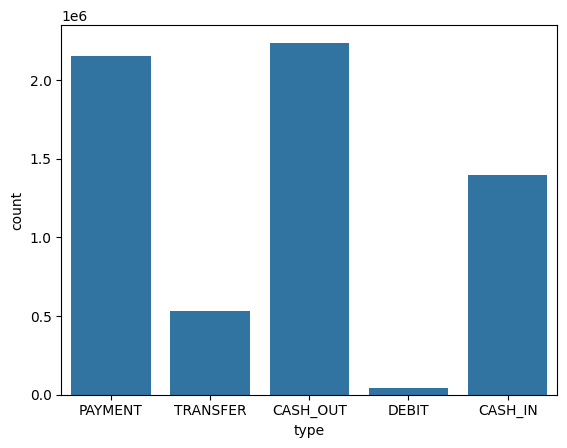

In [ ]:
sns.countplot(x='type', data=fraud)

In [ ]:
fraud[fraud['amount']>fraud['oldbalanceOrg']]['type'].value_counts()

CASH_OUT    1981122
PAYMENT     1101124
TRANSFER     507512
CASH_IN      477536
DEBIT         11786
Name: type, dtype: int64

Amount of transaction can not be greater than the oldbalanceOrg??? Incorrect data.

In [ ]:
fraud = fraud.drop(fraud[(fraud['amount'] > fraud['oldbalanceOrg']) & (fraud['type'] != 'CASH_IN')].index)
fraud.reset_index(drop=True)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2761071,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
2761072,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
2761073,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
2761074,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [ ]:
fraud['nameOrig'].unique()

array(['C1231006815', 'C1666544295', 'C1305486145', ..., 'C1162922333',
       'C1685995037', 'C1280323807'], dtype=object)

In [ ]:
fraud['cOrig'] = fraud['nameOrig'].apply(lambda x: 1 if str(x).startswith('C') else 0)
fraud['cOrig'].unique()

array([1])

All transactions initiated by customers. So we don't need the "cOrig" column and the "nameOrig" column.

In [ ]:
fraud = fraud.drop(columns=['cOrig'])
fraud = fraud.drop(columns=['nameOrig'])

In [ ]:
fraud['nameDest'].unique()

array(['M1979787155', 'M2044282225', 'C553264065', ..., 'C1850423904',
       'C1881841831', 'C2080388513'], dtype=object)

In [ ]:
fraud['nDest'] = fraud['nameDest'].apply(lambda x: 1 if str(x).startswith('C') else (0 if str(x).startswith('M') else -1))
fraud['nDest'].unique()

array([0, 1])

Destination can be Customer or Merchant so we change the nameDest column such that:
- any row with transaction destination of merchant is changed to 0
- any row with transaction destination of customer is changed to 1
- Temporary column "nDest" is dropped

In [ ]:
fraud['nameDest'] = fraud['nameDest'].apply(lambda x: 1.0 if str(x).startswith('C') else 0.0)
fraud = fraud.drop(columns=['nDest'])
fraud['nameDest'].unique()

array([0., 1.])

In [ ]:
fraud['isFraud'].value_counts()

0    2752892
1       8184
Name: isFraud, dtype: int64

In [ ]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2761076 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   nameDest        float64
 6   oldbalanceDest  float64
 7   newbalanceDest  float64
 8   isFraud         int64  
 9   isFlaggedFraud  int64  
dtypes: float64(6), int64(3), object(1)
memory usage: 231.7+ MB


In [ ]:
fraud.isnull().sum()

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

In [ ]:
encoded_data = fraud.copy()
encoded_data['type_encoded'] = encoder.fit_transform(encoded_data[['type']])
encoded_data = encoded_data.drop('type', axis=1)
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2761076 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   amount          float64
 2   oldbalanceOrg   float64
 3   newbalanceOrig  float64
 4   nameDest        float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         int64  
 8   isFlaggedFraud  int64  
 9   type_encoded    float64
dtypes: float64(7), int64(3)
memory usage: 231.7 MB


In [ ]:
encoded_data.isnull().sum()

step              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
type_encoded      0
dtype: int64

In [ ]:
import numpy as np

<Axes: >

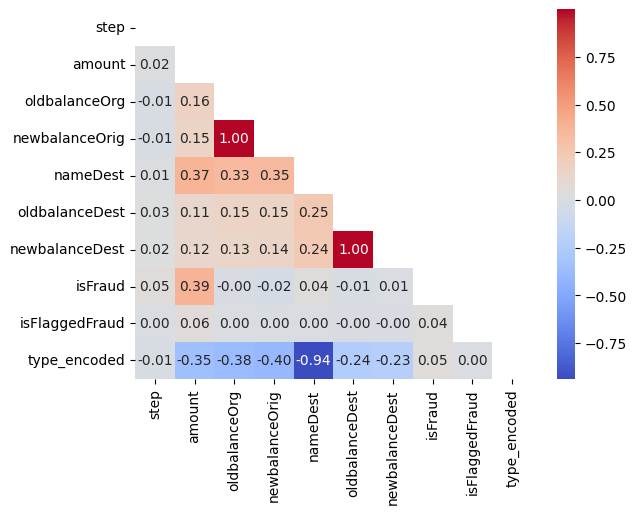

In [ ]:
corr_matrix = encoded_data.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask=mask)

<Axes: xlabel='oldbalanceOrg', ylabel='newbalanceOrig'>

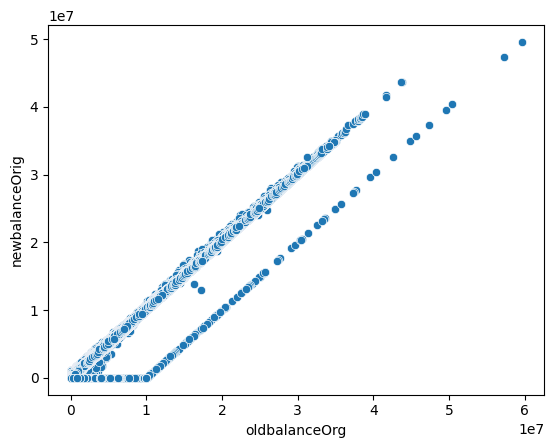

In [ ]:
sns.scatterplot(x=encoded_data['oldbalanceOrg'], y=encoded_data['newbalanceOrig'])

<Axes: xlabel='oldbalanceDest', ylabel='newbalanceDest'>

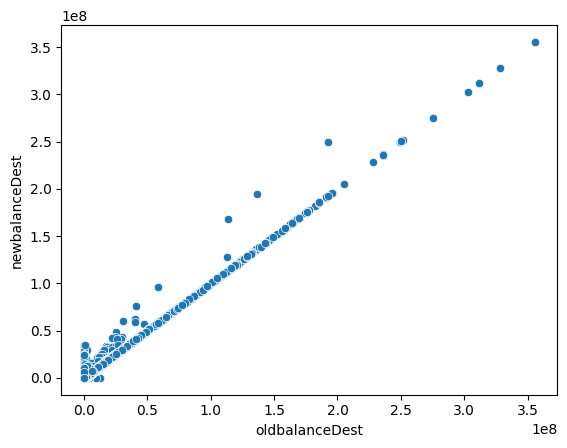

In [ ]:
sns.scatterplot(x=encoded_data['oldbalanceDest'], y=encoded_data['newbalanceDest'])

<Axes: >

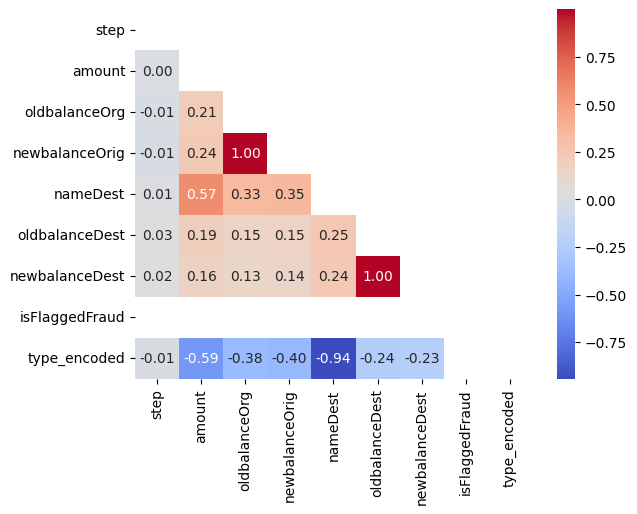

In [ ]:
corr_matrix_notfraud = encoded_data[encoded_data['isFraud']==0].drop(columns=['isFraud']).corr()
mask2 = np.triu(np.ones_like(corr_matrix_notfraud, dtype=bool))
sns.heatmap(corr_matrix_notfraud, annot=True, cmap='coolwarm', fmt=".2f", mask=mask2)

<Axes: >

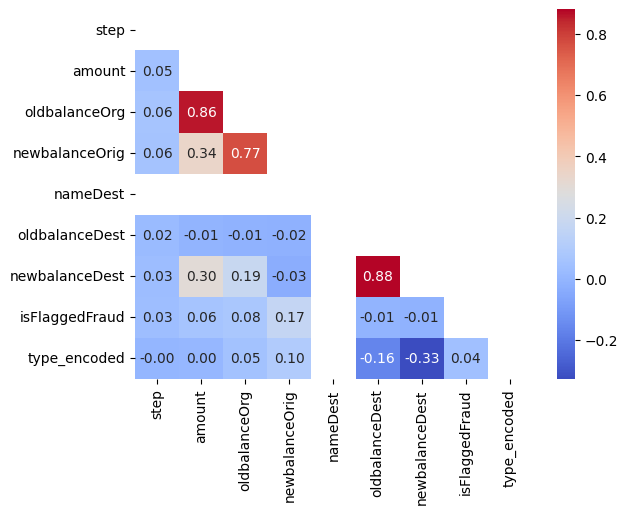

In [ ]:
corr_matrix_fraud = encoded_data[encoded_data['isFraud']==1].drop(columns=['isFraud']).corr()
mask2 = np.triu(np.ones_like(corr_matrix_fraud, dtype=bool))
sns.heatmap(corr_matrix_fraud, annot=True, cmap='coolwarm', fmt=".2f", mask=mask2)

- "oldbalanceOrg" appears to have a strong relation with the amount in fraudulent transactions but not so significant in non fraudulent ones.
- "nameDest" appears to be constant for all fradulant transactions...
- "isFlaggedFraud" appears to be constant for all non fraudulent transactions...

<Axes: xlabel='oldbalanceOrg', ylabel='amount'>

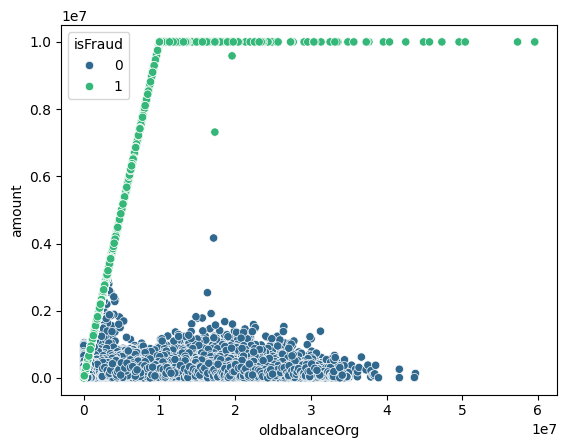

In [ ]:
sns.scatterplot(x=encoded_data['oldbalanceOrg'], y=encoded_data['amount'], hue=encoded_data['isFraud'], data=encoded_data, palette='viridis')

For higher "oldbalanceOrg" values, fraudulent transactions tend to have higher amount than non fraudulent ones.

In [ ]:
encoded_data[encoded_data['isFraud']==1]['nameDest'].value_counts()

1.0    8184
Name: nameDest, dtype: int64

Only transactions with Customer destinations are fraud.



In [ ]:
encoded_data[encoded_data['nameDest']==1]['isFraud'].value_counts()

0    1702521
1       8184
Name: isFraud, dtype: int64

Not all transactions with customer destination are fraud

In [ ]:
encoded_data[encoded_data['isFraud']==0]['isFlaggedFraud'].value_counts()

0    2752892
Name: isFlaggedFraud, dtype: int64

No non fraudulent transaction is flagged fraud

In [ ]:
encoded_data[encoded_data['isFraud']==1]['isFlaggedFraud'].value_counts()

0    8168
1      16
Name: isFlaggedFraud, dtype: int64

Fraudulent transactions are not all flagged fraud

<Axes: xlabel='type_encoded', ylabel='count'>

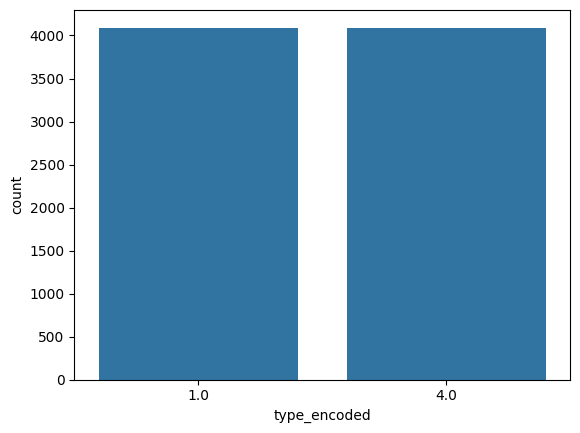

In [ ]:
sns.countplot(x='type_encoded', data=encoded_data[encoded_data['isFraud']==1])

In [ ]:
encoded_data[encoded_data['isFraud']==1]['type_encoded'].value_counts()

4.0    4092
1.0    4092
Name: type_encoded, dtype: int64

All frauds are either "CASH_OUT" or "TRANSFER" type.

<Axes: xlabel='type_encoded', ylabel='count'>

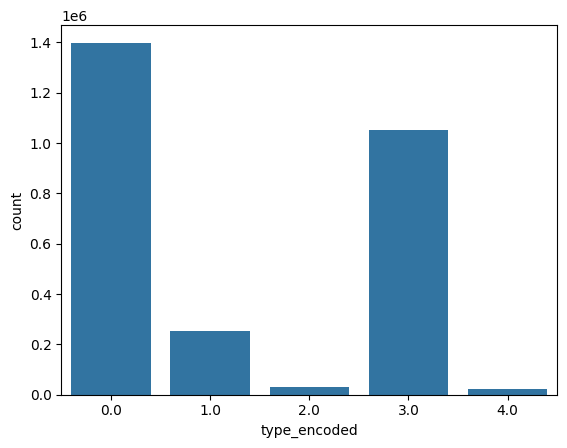

In [ ]:
sns.countplot(x='type_encoded', data=encoded_data[encoded_data['isFraud']==0])

Some "CASH_OUT" and "TRANSFER" type transactions are not fraudulent.

In [ ]:
print(encoded_data[encoded_data['amount']<200000]['isFlaggedFraud'].value_counts())
print(encoded_data[encoded_data['amount']>=200000]['isFlaggedFraud'].value_counts())

0    2245377
Name: isFlaggedFraud, dtype: int64
0    515683
1        16
Name: isFlaggedFraud, dtype: int64


In [ ]:
encoded_data['isFlaggedFraud'] = encoded_data.apply(lambda x: 1 if x['amount'] >= 200000 else 0, axis=1)

In [ ]:
print(encoded_data[encoded_data['amount']<200000]['isFlaggedFraud'].value_counts())
print(encoded_data[encoded_data['amount']>=200000]['isFlaggedFraud'].value_counts())

0    2245377
Name: isFlaggedFraud, dtype: int64
1    515699
Name: isFlaggedFraud, dtype: int64


In [ ]:
encoded_data.to_csv("/content/drive/MyDrive/Accredian_Data/cleaned_data_skewed.csv", index=False)
# encoded_data.to_csv("./cleaned_data.csv", index=False) # To save without Google Drive

Data too skewed.

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
indices_to_drop = encoded_data[encoded_data["isFraud"]==0].sample(frac=0.85).index
encoded_data = encoded_data.drop(indices_to_drop)
encoded_data = encoded_data.reset_index(drop=True)
X = encoded_data.drop(columns=['isFraud'])
Y = encoded_data['isFraud']
smote = SMOTE(random_state=13)

X_resampled, Y_resampled = smote.fit_resample(X, Y)
encoded_data = pd.DataFrame(X_resampled, columns=X.columns)
encoded_data['isFraud'] = Y_resampled
encoded_data['isFraud'].value_counts()

1    412934
0    412934
Name: isFraud, dtype: int64

In [ ]:
encoded_data.to_csv("/content/drive/MyDrive/Accredian_Data/cleaned_data.csv", index=False)
# encoded_data.to_csv("./cleaned_data.csv", index=False) # To save without Google Drive

### Model Training

In [ ]:
import pandas as pd
encoded_data = pd.read_csv("/content/drive/MyDrive/Accredian_Data/cleaned_data.csv")
# fraud = pd.read_csv("cleaned_data.csv", error_bad_lines=False) # Use when "cleaned_data.csv" is uploaded

In [ ]:
encoded_data.isnull().sum()

step              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFlaggedFraud    0
type_encoded      0
isFraud           0
dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import cross_val_score, KFold, learning_curve, train_test_split


In [ ]:
X = encoded_data.drop(columns=['isFraud'])
Y = encoded_data['isFraud']
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.5, random_state=13)
X_test, X_val, Y_test, Y_val = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=13)

In [ ]:
models = [
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    GaussianNB(),
    MultinomialNB(),
    SGDClassifier()
]
model_metrics = {}
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
for model in models:
    model_name = model.__class__.__name__
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred)
    cv_results = cross_val_score(model, X_val, Y_val, cv=kfold, scoring='accuracy')

    model_metrics[model_name] = {
        'Accuracy': accuracy,
        'F1 Score': f1,
        'Precision': precision,
        'Cross-Val': cv_results
    }

In [ ]:
for model_name, metrics in model_metrics.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"F1 Score: {metrics['F1 Score']:.4f}")
    print(f"Precision: {metrics['Precision']:.4f}")
    print("Cross-Validation Results:")
    print("Accuracy - Mean:", cv_results.mean())
    print("Accuracy - Standard Deviation:", cv_results.std())
    print("="*30)

Model: LogisticRegression
Accuracy: 0.9145
F1 Score: 0.9147
Precision: 0.9161
Cross-Validation Results:
Accuracy - Mean: 0.8813803924011421
Accuracy - Standard Deviation: 0.031724643990650454
Model: KNeighborsClassifier
Accuracy: 0.9936
F1 Score: 0.9937
Precision: 0.9883
Cross-Validation Results:
Accuracy - Mean: 0.8813803924011421
Accuracy - Standard Deviation: 0.031724643990650454
Model: DecisionTreeClassifier
Accuracy: 1.0000
F1 Score: 1.0000
Precision: 1.0000
Cross-Validation Results:
Accuracy - Mean: 0.8813803924011421
Accuracy - Standard Deviation: 0.031724643990650454
Model: GaussianNB
Accuracy: 0.7626
F1 Score: 0.7040
Precision: 0.9416
Cross-Validation Results:
Accuracy - Mean: 0.8813803924011421
Accuracy - Standard Deviation: 0.031724643990650454
Model: MultinomialNB
Accuracy: 0.8738
F1 Score: 0.8878
Precision: 0.8021
Cross-Validation Results:
Accuracy - Mean: 0.8813803924011421
Accuracy - Standard Deviation: 0.031724643990650454
Model: SGDClassifier
Accuracy: 0.8784
F1 Score:

KNN and DecisionTree look promising...

### Model Selection and Validation

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np

In [ ]:
import pandas as pd
encoded_data = pd.read_csv("/content/drive/MyDrive/Accredian_Data/cleaned_data.csv")
# fraud = pd.read_csv("cleaned_data.csv", error_bad_lines=False) # Use when "cleaned_data.csv" is uploaded

In [ ]:
encoded_data.isnull().sum()

step              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFlaggedFraud    0
type_encoded      0
isFraud           0
dtype: int64

In [ ]:
X = encoded_data.drop(columns=['isFraud'])
Y = encoded_data['isFraud']
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.5, random_state=13)
X_test, X_val, Y_test, Y_val = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=13)

In [ ]:
def plot_confusion_matrix(Y_true, Y_pred, model_name):
    cm = confusion_matrix(Y_true, Y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

In [ ]:
def plot_learning_curve(model, X, Y, title):
    train_sizes, train_losses, test_losses = learning_curve(model, X, Y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='neg_mean_squared_error', n_jobs=-1)

    train_losses_mean = -np.mean(train_losses, axis=1)
    train_losses_std = np.std(train_losses, axis=1)
    test_losses_mean = -np.mean(test_losses, axis=1)
    test_losses_std = np.std(test_losses, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Loss")

    plt.fill_between(train_sizes, train_losses_mean - train_losses_std, train_losses_mean + train_losses_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_losses_mean - test_losses_std, test_losses_mean + test_losses_std, alpha=0.1, color="g")

    plt.plot(train_sizes, train_losses_mean, 'o-', color="r", label="Training loss")
    plt.plot(train_sizes, test_losses_mean, 'o-', color="g", label="Cross-validation loss")

    plt.legend(loc="best")
    plt.grid(True)
    plt.show()


In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier()

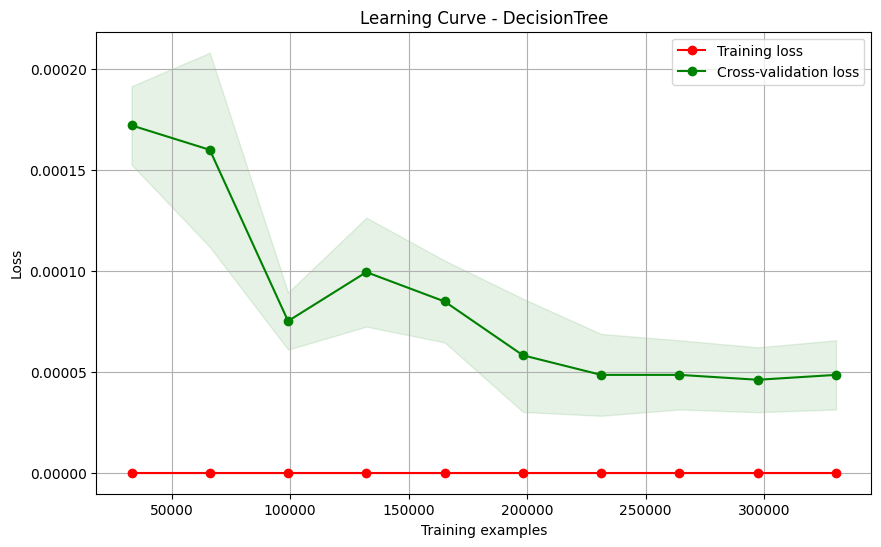

In [ ]:
plot_learning_curve(model, X_train, Y_train, "Learning Curve - DecisionTree")

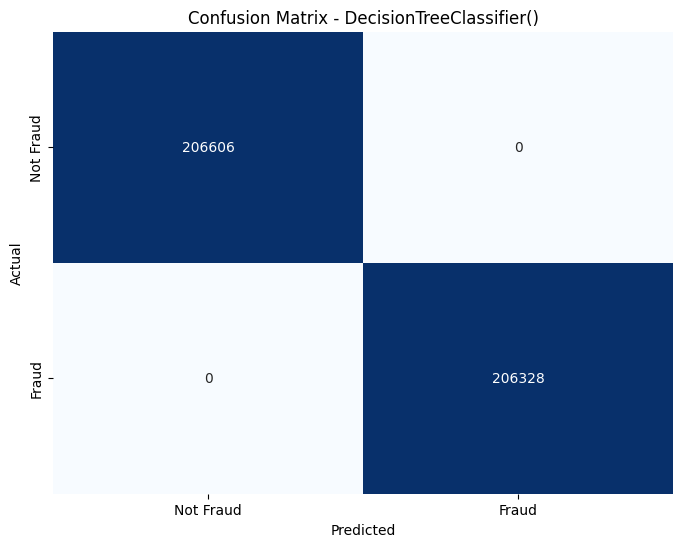

In [ ]:
Y_pred = model.predict(X_train)
plot_confusion_matrix(Y_train, Y_pred, model)

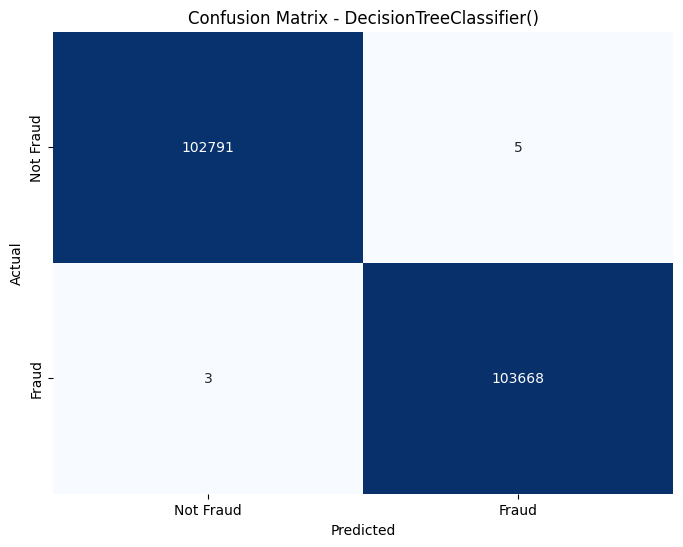

In [ ]:
Y_pred = model.predict(X_test)
plot_confusion_matrix(Y_test, Y_pred, model)

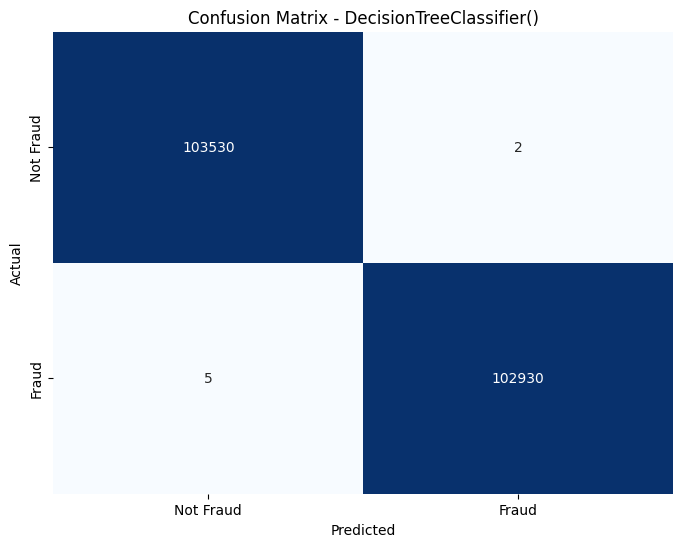

In [ ]:
Y_pred = model.predict(X_val)
plot_confusion_matrix(Y_val, Y_pred, model)

DECISION TREE looks like it has overfit the data.

In [ ]:
model = KNeighborsClassifier()
model.fit(X_train, Y_train)

KNeighborsClassifier()

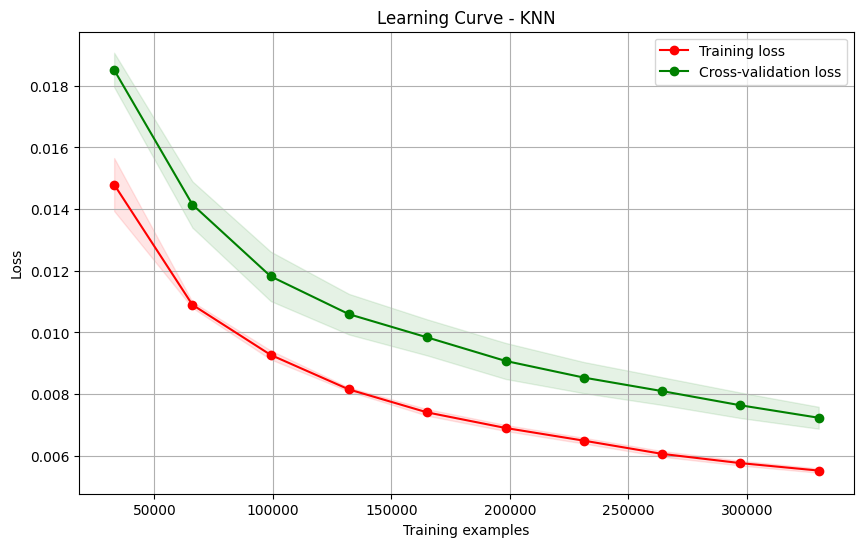

In [ ]:
plot_learning_curve(model, X_train, Y_train, "Learning Curve - KNN")

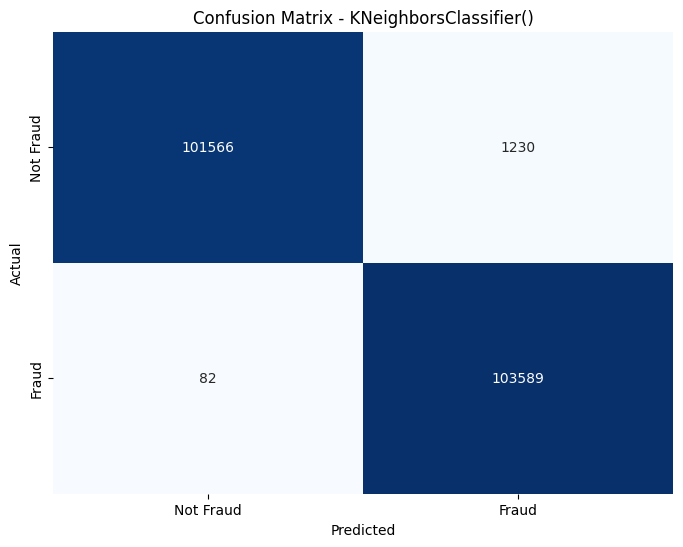

In [ ]:
Y_pred = model.predict(X_test)
plot_confusion_matrix(Y_test, Y_pred, model)

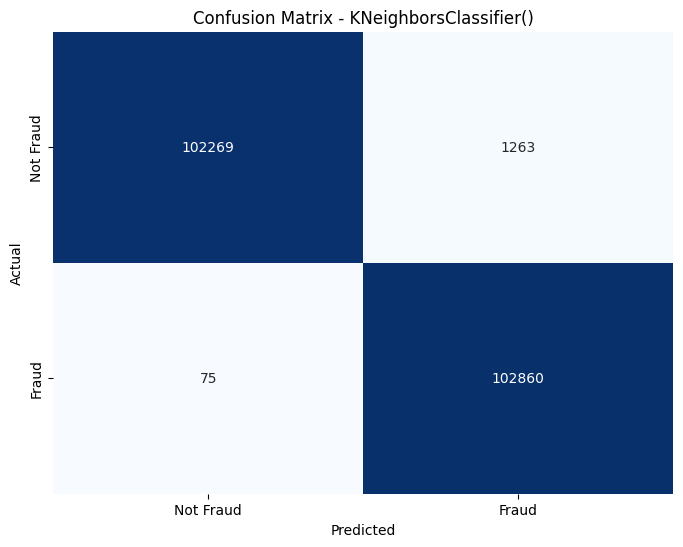

In [ ]:
Y_pred = model.predict(X_val)
plot_confusion_matrix(Y_val, Y_pred, model)

KNN has performed well.

The Accuracy and Precision are up to standards and hence no Hyperparameter Tuning is required.

In [ ]:
final_model = KNeighborsClassifier()
final_model.fit(X_train, Y_train)

KNeighborsClassifier()

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Accredian_Data/cleaned_data_skewed.csv")

In [ ]:
test_x = df.head(20).drop(columns=['isFraud'])
test_y = df.head(20)['isFraud']

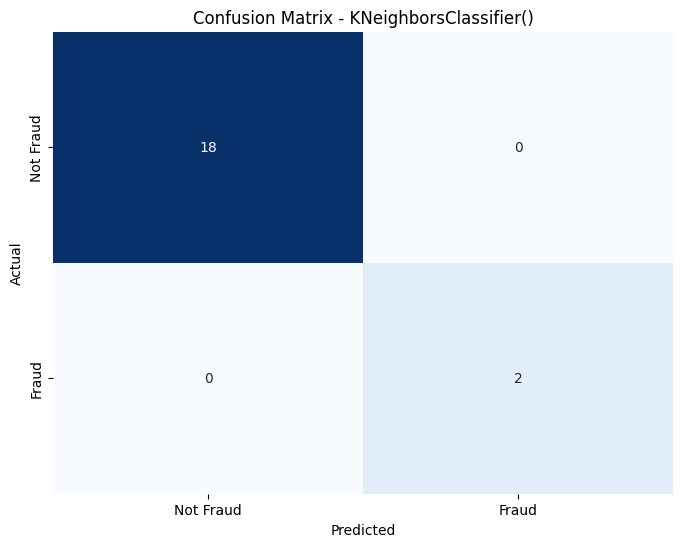

In [ ]:
pred_y = final_model.predict(test_x)
plot_confusion_matrix(test_y, pred_y, final_model)

In [ ]:
import pickle

In [ ]:
with open('/content/drive/MyDrive/Accredian_Data/final_model.pkl', 'wb') as file:
    pickle.dump(model, file)
### To save without drive
# with open('final_model.pkl', 'wb') as file:
#     pickle.dump(model, file)